In [18]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D, Dropout, TimeDistributed
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## Simple LSTM Model

Epoch 1/20
25/25 [==============================] - 13s 401ms/step - loss: 6.8910 - accuracy: 0.7073 - val_loss: 3.6672 - val_accuracy: 0.7717
Epoch 2/20
25/25 [==============================] - 10s 386ms/step - loss: 2.4243 - accuracy: 0.7682 - val_loss: 2.0309 - val_accuracy: 0.7717
Epoch 3/20
25/25 [==============================] - 10s 399ms/step - loss: 2.0545 - accuracy: 0.7680 - val_loss: 2.0079 - val_accuracy: 0.7717
Epoch 4/20
25/25 [==============================] - 10s 387ms/step - loss: 2.0054 - accuracy: 0.7681 - val_loss: 1.9627 - val_accuracy: 0.7717
Epoch 5/20
25/25 [==============================] - 10s 394ms/step - loss: 1.9403 - accuracy: 0.7681 - val_loss: 1.8976 - val_accuracy: 0.7717
Epoch 6/20
25/25 [==============================] - 10s 415ms/step - loss: 1.8554 - accuracy: 0.7681 - val_loss: 1.8107 - val_accuracy: 0.7717
Epoch 7/20
25/25 [==============================] - 10s 413ms/step - loss: 1.7549 - accuracy: 0.7682 - val_loss: 1.7320 - val_accuracy: 0.7717

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


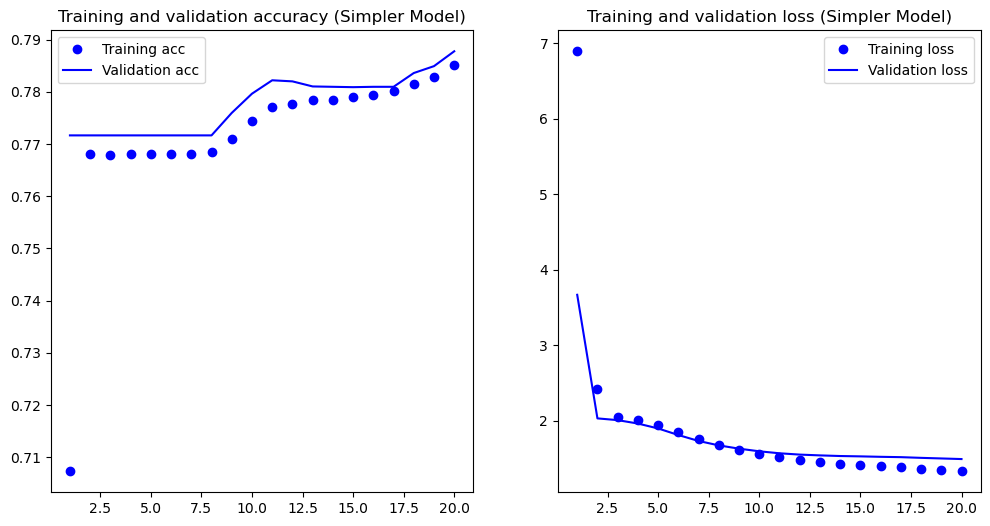

In [21]:
# Define a simpler model
simpler_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),  # Reduced embedding dimension
    SpatialDropout1D(0.2),
    LSTM(128, return_sequences=True),  # Single LSTM layer with fewer units
    Dropout(0.5),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

simpler_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the simpler model
simpler_history = simpler_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Save the simpler model
simpler_model.save('hinglish_to_english_translation_model_simpler.h5')

# Plot training history for the simpler model
def plot_training_history_simple(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy (Simpler Model)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss (Simpler Model)')
    plt.legend()
    
    plt.show()

plot_training_history_simple(simpler_history)

The following presents information on the training process of a machine learning model for 20 epochs. An epoch is a full pass through the entire training dataset. 

**Improvement Over Time**: The model shows a kind of gradual improvement over 20 epochs, resulting in reduced loss and increased accuracy on both training and validation datasets. This trend would mean good learning for the model from training data.

**Loss**: Loss metrics (training and validation loss) measure the deviation of the model's prediction for its input data from the true target value. If loss decreases over time, then it indicates that the model's predictions are approaching correctness. 

**Accuracy**: It displays the number of correct predictions from the model. The increase in trend (for both training and validation) gives the notion that with the increase in data processing, the model has a tendency to be better in making correct predictions. 

**Convergence**: The loss and accuracy both are tending to change at a decreasing rate towards the later epochs, which is a clear indication that the model starts converging and is at an optimal state. The training is such that further training barely results in more significant improvement in the effect on the metrics. 

**Model Performance**: The model was able to get a training accuracy of 78.52% with a loss of 1.3307 and a validation accuracy of 78.78% with a loss of 1.4926 in the last epoch. This balanced performance revealed a model that, jointly with training metrics, followed the line of validation metrics in improvement, hence no clear indication of model overfitting.

**Short Summary**: The output from training indicated that the process learning was a success, since the model showed clear improvement in its ability to predict or classify correctly. There is no apparent overfitting, and both loss and accuracy metrics improve in a promising way, which could give one a good sign that the model may perform well on unseen data. Further evaluations and experiments with different model hyper-parameters on a separate test set may be useful to gauge the potential of these methods in improving robustness.


## LSTM Model with increased Complexity

In [ ]:
# Load the data
data = pd.read_csv("hinglish_sentences.csv")

# Use Hinglish sentences as input and English sentences as output
input_sentences = data['Hinglish']
output_sentences = data['English']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(input_sentences) + list(output_sentences))
input_sequences = tokenizer.texts_to_sequences(input_sentences)
output_sequences = tokenizer.texts_to_sequences(output_sentences)

# Find the maximum sequence length for padding
max_length = max(max(len(seq) for seq in input_sequences), max(len(seq) for seq in output_sequences))
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
input_padded = pad_sequences(input_sequences, maxlen=max_length, padding='post')
output_padded = pad_sequences(output_sequences, maxlen=max_length, padding='post')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(input_padded, output_padded, test_size=0.2, random_state=42)

# Model building with added complexity
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=512, input_length=max_length),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with increased epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# To save the model for future use
model.save('hinglish_to_english_translation_model_improved.h5')

# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_training_history(history)


The output details a series of training epochs for a neural network to be fit, showing how the model's performance might be changed over 20 epochs. Below is a very brief summary.

**Start of Improvement**: After going through the above stages, the first thing the model did was start with a loss of 3.8585 and an accuracy of 73.72% on the training set. On the validation set, the model started with a loss of 1.8442, and the validation accuracy is 77.17%. Now, clearly, it can be seen that the model starts with some prior understanding of the training data and the validation data, which is fair.

**Consistent Progress**: As epochs continue to increase, the training loss and validation loss keep decreasing. Also, training and validation accuracies keep increasing. It indicates that throughout the processing of further information from the training data, the model actually learns and improves its prediction.

**Faster Learning Pace**: On the contrary, the shown model works much faster to improve both the reduction in loss and the increase in accuracy. This could be attributed to a few things—perhaps more effective model architecture, hyperparameter settings, or most probably, the best quality of the data being used.

**Significant Gains in Later Epochs**: From epochs 10-20, substantial improvements were observed. For example, training accuracy went up to 85.23% from 78.22%, and validation accuracy went up to 84.72% from 78.60%. Such a drastic improvement might signal that the model has started to generalize well and, therefore, capture the underlying patterns in the data.

**Validation Loss Decrease**: The loss decrease is less sharp and steadier than in the previous case; it rounds off to 1.3367 at the last epoch.
This smoother decrease is a good sign that speaks of the model not only memorizing the training data but learning generalized patterns that hold valid for also unseen data.

**Summary**: In this training session, you saw a neural network that gets highly effective at learning to correctly predict or classify over time. This consistent decrease in loss and increase in accuracy, especially for the later epochs, is indicative of good, effective learning, and generally good generalization to unseen data. The model ends with high accuracy, indicating strong performance. However, these would be major to ensure, for example, that the model is indeed robust for use in the real world of data through the monitoring of the overfitting and evaluation of a separated test set.

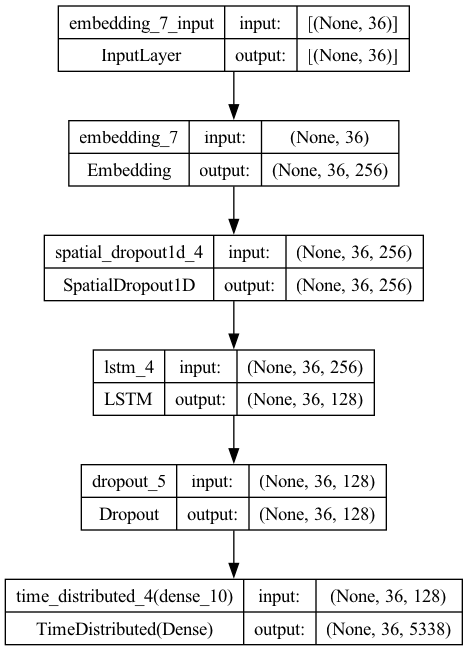

In [23]:
# Assuming 'model' is your trained model
plot_model(simpler_model, to_file='simple_model.png', show_shapes=True, show_layer_names=True)

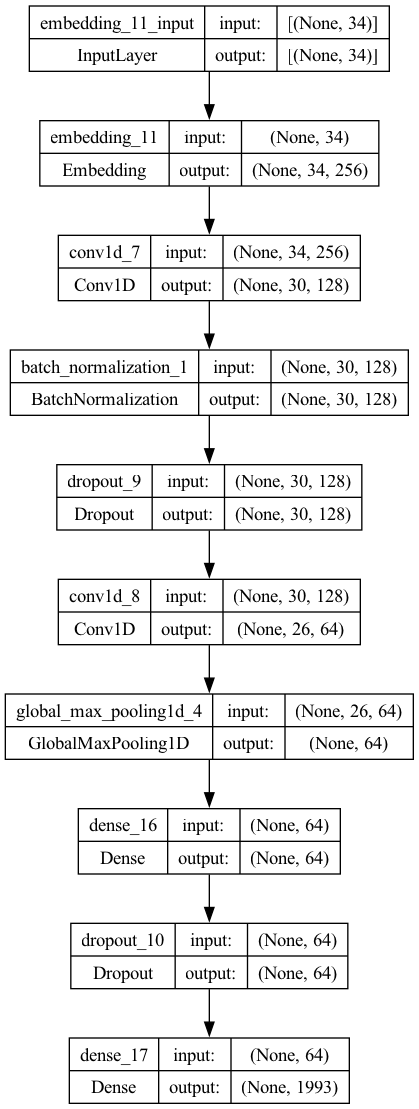

In [30]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your trained model
plot_model(model, to_file='CNN_Improved.png', show_shapes=True, show_layer_names=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 34, 256)           1138688   
                                                                 
 conv1d_9 (Conv1D)           (None, 30, 128)           163968    
                                                                 
 global_max_pooling1d_5 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1993)              129545    
                                                                 
Total params: 1440457 (5.49 MB)
Trainable params: 1440457 (5.49 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

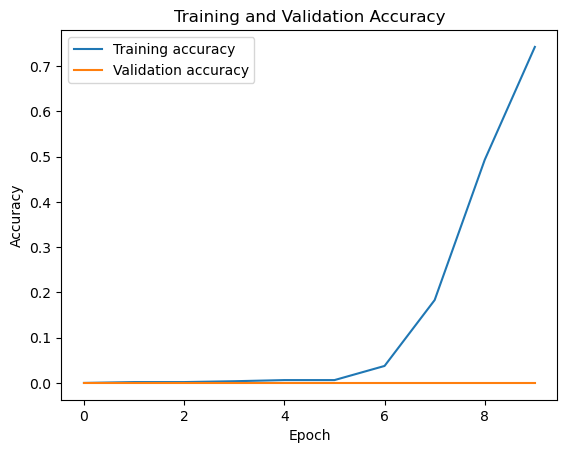

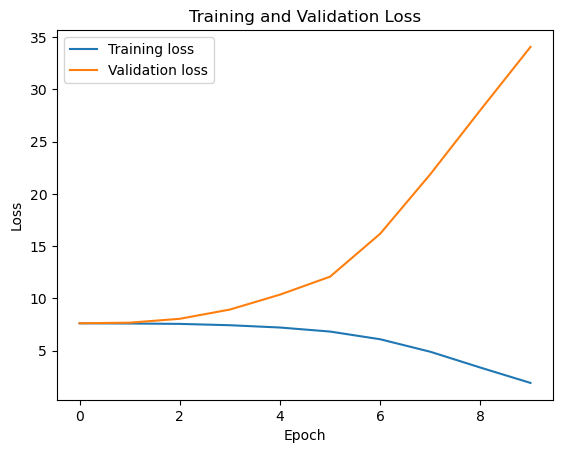

In [31]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
data = pd.read_csv('hinglish_sentences.csv')

# For demonstration, assuming 'Hinglish' is input and 'Label' is to be predicted
input_sentences = data['Hinglish'].fillna('').astype(str)
# Simulating output labels as categorical (update this based on your actual task)
output_labels = pd.get_dummies(data['English']).values  # Example for categorical labels

# Step 2: Tokenization and Sequencing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_sentences)
sequences = tokenizer.texts_to_sequences(input_sentences)

max_length = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1

input_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Step 3: Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(input_padded, output_labels, test_size=0.2, random_state=42)

# Step 4: Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Adjust the output layer as per the number of categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Model Training
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Step 6: Evaluation and Visualization
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 34, 256)           1138688   
                                                                 
 conv1d_7 (Conv1D)           (None, 30, 128)           163968    
                                                                 
 batch_normalization_1 (Bat  (None, 30, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 30, 128)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 26, 64)            41024     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                   

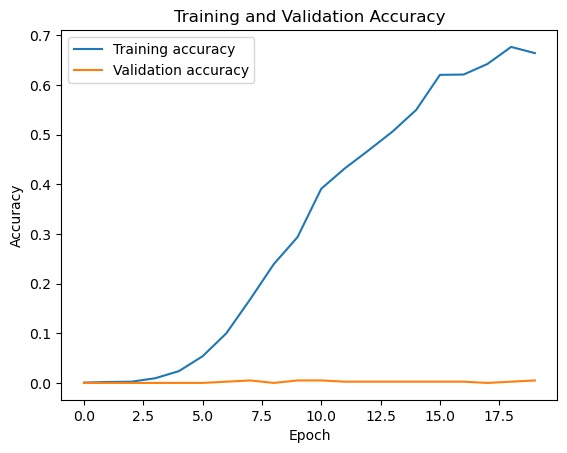

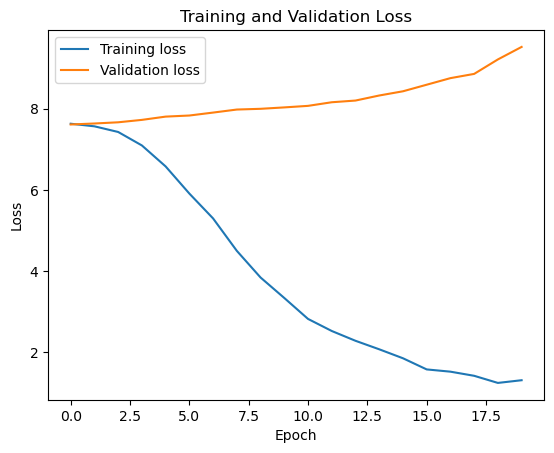

In [29]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and Preprocess Data
data = pd.read_csv('hinglish_sentences.csv')

input_sentences = data['Hinglish'].fillna('').astype(str)
output_labels = pd.get_dummies(data['English']).values  # Assuming 'English' is the target

# Tokenization and Sequencing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_sentences)
sequences = tokenizer.texts_to_sequences(input_sentences)

max_length = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1

input_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(input_padded, output_labels, test_size=0.2, random_state=42)

# Model Building
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Model Training
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Evaluation and Visualization
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The issues with the CNN model: 

**Overfitting**: The model has probably memorized the training data, falling short in learning the underlying patterns. It usually occurs when the number of model parameters is too high compared to the size of the training data.


**Non-representative Validation Data**: The validation data may not represent the data on which the model has to make predictions under quite a number of scenarios. This may result from a bad split or simply that the data lacked diversity.


**Inappropriate Model Complexity**: Model complexity might be higher for the task than necessary, hence trying to fit not only the signal in the training data but also the noise.


**Possible Data Leakage**: The model might exhibit very strong performance during the training stage because of a validation/test data leak into the training set. Generally, however, this too would result in better validation performance unless the leak is unrepresentative.


**Not very well regularized**: Regularization is one of the techniques that would help the model to not overfit by making sure that the over-parametrization of the prediction model You may want to collect more data in such a way that the model can be fitted, simplified, regularized, dropouted, the training-validation split improved, or another model tried.